In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [52]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<h3> QUICK EDA

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [54]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [55]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [56]:
df.duplicated().sum()

0

In [57]:
zeros=df[df["Purchased"]==0]
ones=df[df["Purchased"]==1]

len(zeros),len(ones)

(257, 143)

In [58]:
ones_resample=resample(ones,replace=True,n_samples=len(zeros),random_state=42)
df = pd.concat([zeros, ones_resample])

zeros=df[df["Purchased"]==0]
ones=df[df["Purchased"]==1]

len(zeros),len(ones)

(257, 257)

In [59]:
df=df.sample(frac=1)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
311,15622585,Male,39,96000,1
355,15606472,Male,60,34000,1
388,15672330,Male,47,34000,1
8,15600575,Male,25,33000,0
88,15768816,Male,26,81000,0


In [60]:
df = df.reset_index()
df.drop("index",axis=1,inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15622585,Male,39,96000,1
1,15606472,Male,60,34000,1
2,15672330,Male,47,34000,1
3,15600575,Male,25,33000,0
4,15768816,Male,26,81000,0
...,...,...,...,...,...
509,15729054,Female,27,137000,1
510,15768151,Female,54,108000,1
511,15722061,Female,51,146000,1
512,15671249,Male,46,88000,1


In [61]:
encoder = LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15622585,1,39,96000,1
1,15606472,1,60,34000,1
2,15672330,1,47,34000,1
3,15600575,1,25,33000,0
4,15768816,1,26,81000,0
...,...,...,...,...,...
509,15729054,0,27,137000,1
510,15768151,0,54,108000,1
511,15722061,0,51,146000,1
512,15671249,1,46,88000,1


<h3> Check outlier

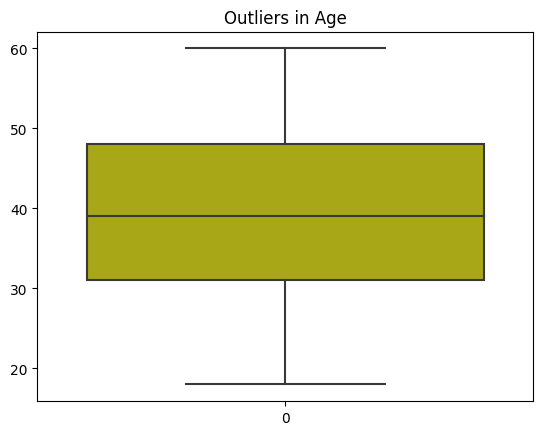

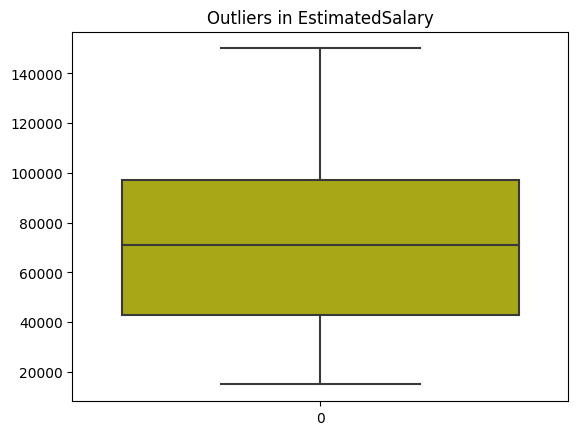

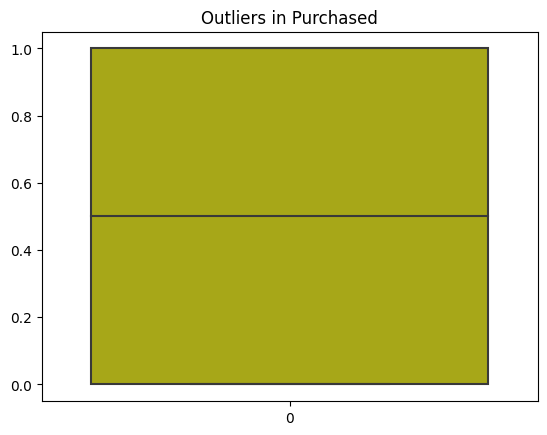

In [62]:
for i in df.columns:
    if i not in ["User ID","Gender"]:
        sns.boxplot(df[i],color="y")
        plt.title("Outliers in "+str(i))
        plt.show()

<h3> Check the Spread of the Data

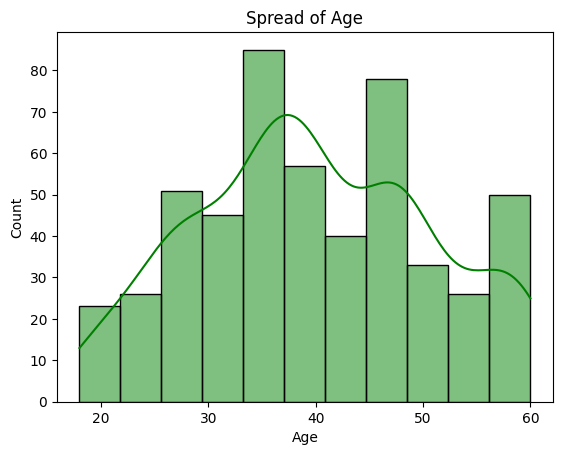

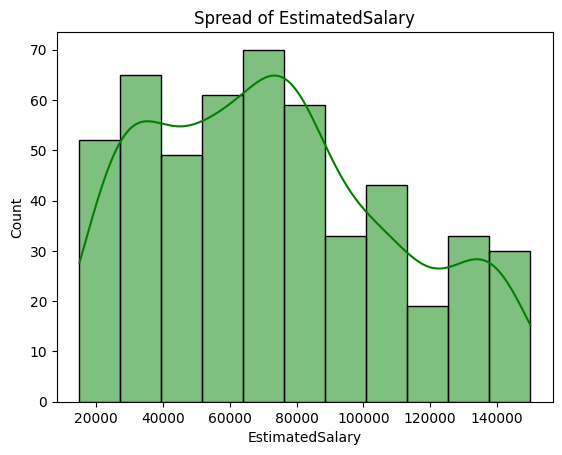

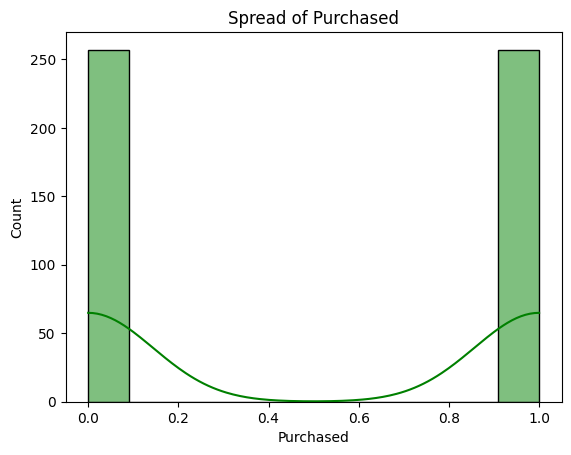

In [63]:
for i in df.columns:
    if i not in ["User ID","Gender"]:
        sns.histplot(df[i],kde=True,color="g")
        plt.title("Spread of "+str(i))
        plt.show()

<h3>Releationship between Age and Estimated salary W.R.T Gender</h3>

Text(0.5, 1.0, 'Age vs Salary')

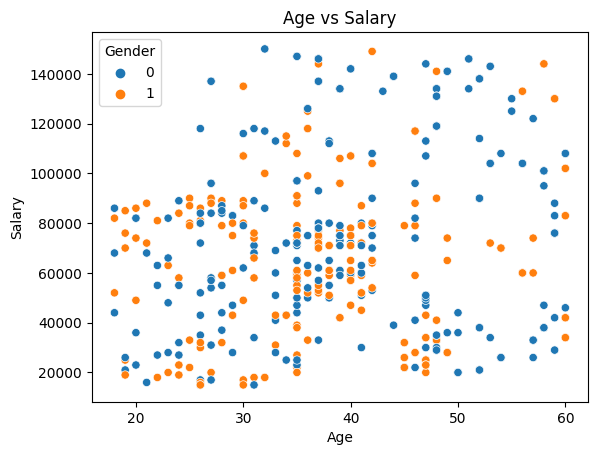

In [64]:
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"],hue=df["Gender"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")

<h3> Releationship between Age and Estimated salary W.R.T Gender

Text(0.5, 1.0, 'Age vs Salary')

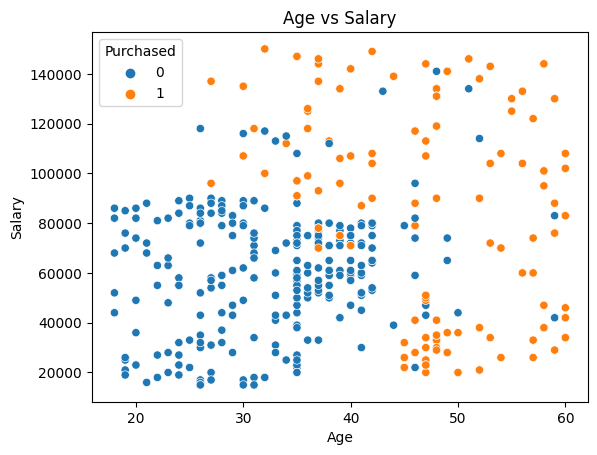

In [65]:
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"],hue=df["Purchased"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")

RESULT:
* If Age is more or If salary is more, then Purchasing power Presents

<h3> Feature Engineering

<Axes: >

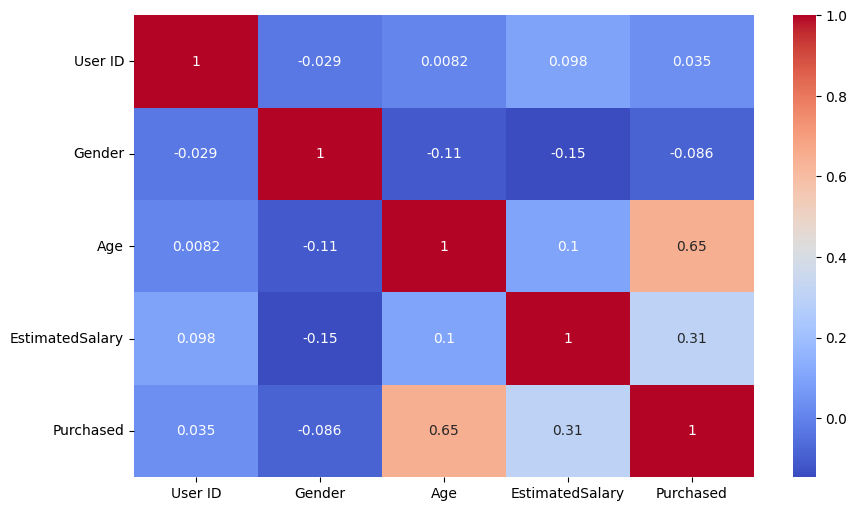

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(method="spearman"),annot=True, cmap="coolwarm")

RESULT :
* Gender and User ID doesn't impact Purchasing, so we can remove them.

In [67]:

df.drop(["Gender","User ID"],axis=1,inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,39,96000,1
1,60,34000,1
2,47,34000,1
3,25,33000,0
4,26,81000,0


In [68]:
scaler=MinMaxScaler()
df['EstimatedSalary'] = scaler.fit_transform(df[['EstimatedSalary']])
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Age,EstimatedSalary,Purchased
0,0.500000,0.600000,1
1,1.000000,0.140741,1
2,0.690476,0.140741,1
3,0.166667,0.133333,0
4,0.190476,0.488889,0


<h3> Split Data between Independent and Dependent Features

In [69]:
X = df.drop("Purchased",axis=1)
y = df["Purchased"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((411, 2), (103, 2), (411,), (103,))

<h3>Model Building</h3>

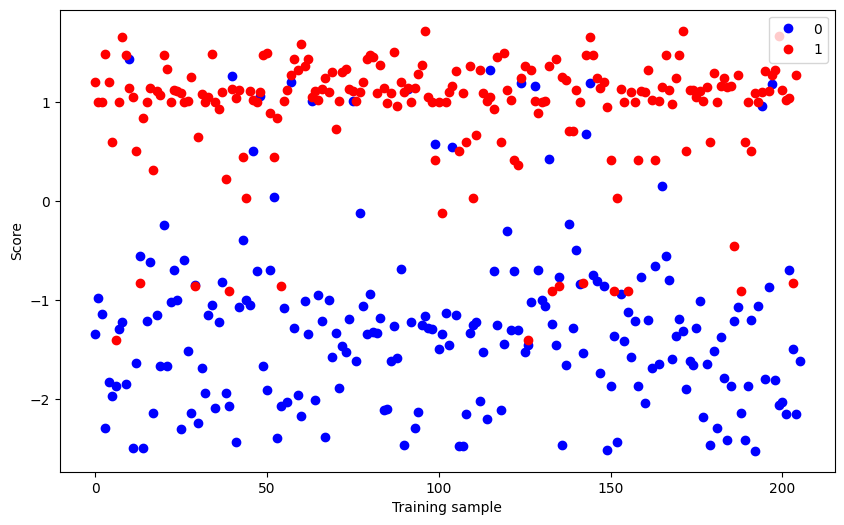

In [70]:
model = SVC()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# plot training result
plt.figure(figsize=(10,6))
plt.plot(model.decision_function(X_train)[y_train==0], "bo", label="0")
plt.plot(model.decision_function(X_train)[y_train==1], "ro", label="1")
plt.xlabel("Training sample")
plt.ylabel("Score")
plt.legend(loc=1)



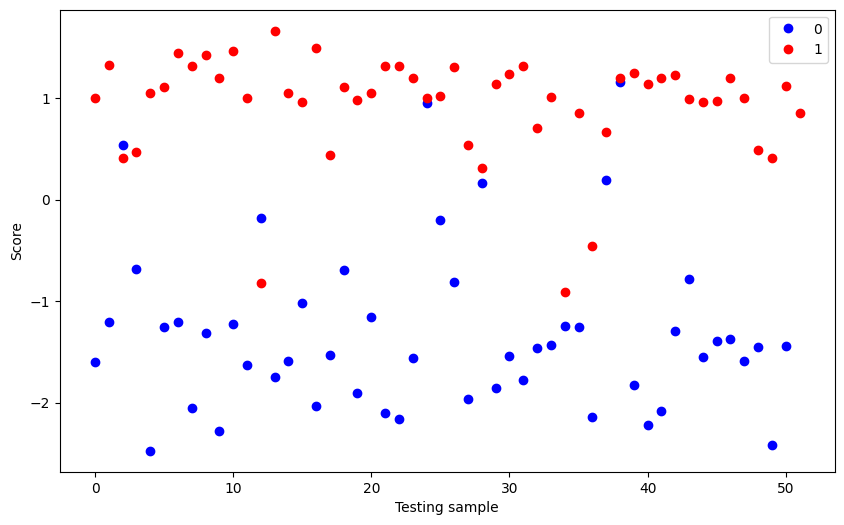

In [71]:
# plot testing result
plt.figure(figsize=(10,6))
plt.plot(model.decision_function(X_test)[y_test==0], "bo", label="0")
plt.plot(model.decision_function(X_test)[y_test==1], "ro", label="1")
plt.xlabel("Testing sample")
plt.ylabel("Score")
plt.legend(loc=1)


In [72]:
# evaluate model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.91      0.94      0.92        52

    accuracy                           0.92       103
   macro avg       0.92      0.92      0.92       103
weighted avg       0.92      0.92      0.92       103



<h3>Hyperparameter Tuning</h3>

In [75]:
grid={
    "degree":[3,6,9,12],
    "gamma":("scale","auto"),
    "shrinking":[True,False],
    "probability":[True,False],
    "random_state":[1,5,10,15,25],
    "coef0":[0.0,1.2,3.4,5.6,77.3]
}

clf=GridSearchCV(model,param_grid=grid,cv=5, verbose=1, n_jobs=-1)
clf.fit(X_train,y_train)

print("TRAINING : " + str(clf.score(X_train,y_train)) + ", TEST : " + str(clf.score(X_test,y_test)))
print("BEST SCORE : " + str(clf.best_score_))
print("BEST PARAMS : " + str(clf.best_params_))


Fitting 5 folds for each of 800 candidates, totalling 4000 fits


TRAINING : 0.9148418491484185, TEST : 0.9223300970873787
BEST SCORE : 0.9099324125771379
BEST PARAMS : {'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'probability': True, 'random_state': 1, 'shrinking': True}


In [77]:
model = SVC(coef0=0.0, degree=3, gamma='scale', probability=True, random_state=1, shrinking=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.91      0.94      0.92        52

    accuracy                           0.92       103
   macro avg       0.92      0.92      0.92       103
weighted avg       0.92      0.92      0.92       103

